In [40]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

working_dir = os.getcwd()
working_dir

'd:\\Project\\OpenCV'

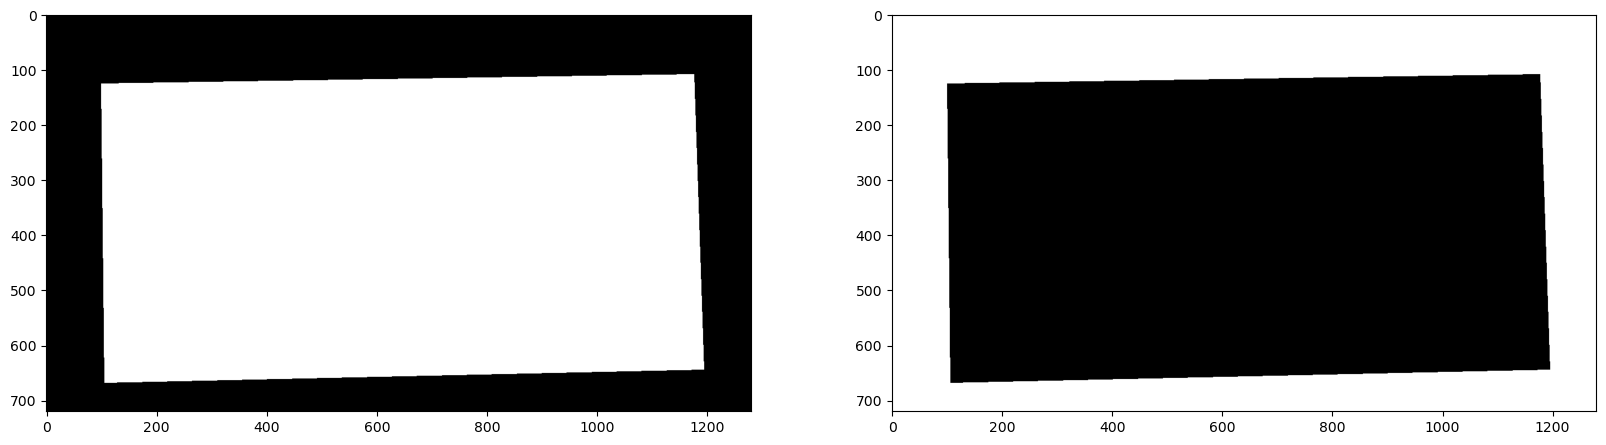

uint8
uint8


In [41]:
#관심영역 설정 방법
image = cv.imread('image/seed_011.jpg', cv.IMREAD_UNCHANGED)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

points = np.array([(100, 126), (1176, 109), (1194, 644), (106, 668)])

# 흑색 배경
black = np.zeros_like(image)
cv.fillPoly(black, [points], (255, 255, 255))

# 백색 배경
white = np.ones_like(image) * 255
# white = np.ones((image.shape[0], image.shape[1]), dtype=np.uint8) * 255
cv.fillPoly(white, [points], (0,0,0))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1); plt.imshow(black, cmap='gray')
plt.subplot(1, 2, 2); plt.imshow(white, cmap='gray')
plt.show()

print(image.dtype)
print(black.dtype)

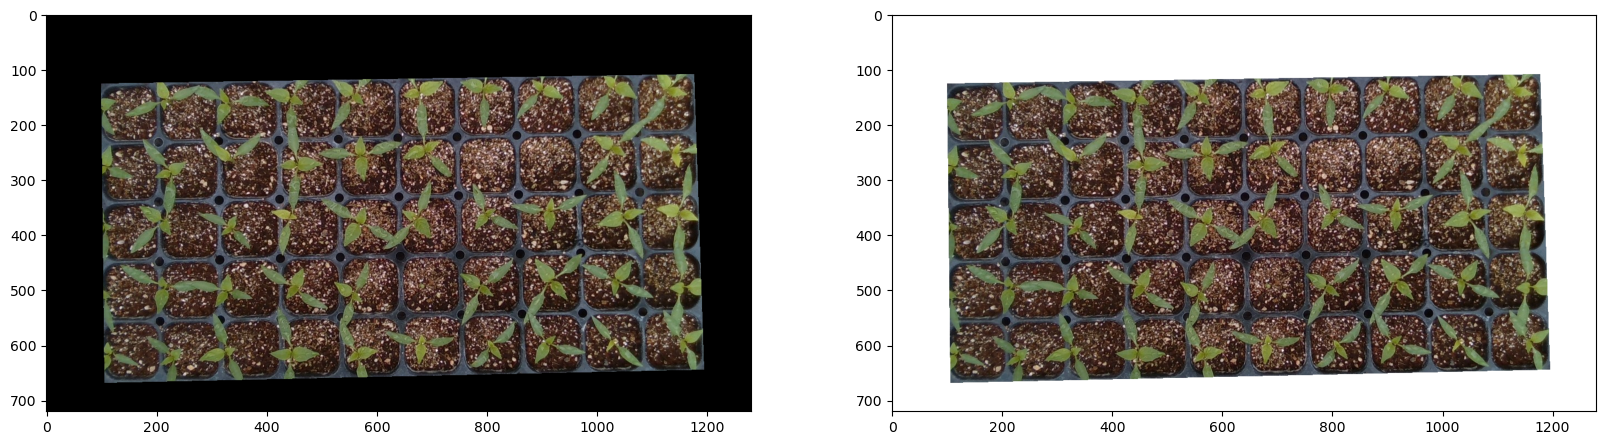

In [42]:

black_cropped = cv.bitwise_and(image, black)
#TODO 흰 배경 마스크 생성
white_cropped = cv.bitwise_or(image, white)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1); plt.imshow(black_cropped)
plt.subplot(1, 2, 2); plt.imshow(white_cropped)
plt.show()

이미지 형태 (720, 1280)
이미지 데이터 타입: uint8


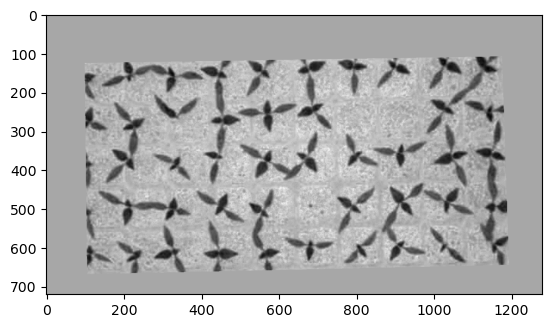

In [43]:
lab_image = cv.cvtColor(black_cropped, cv.COLOR_BGR2LAB)
Lightness, a_channel, b_channel = cv.split(lab_image) # a-channel = green, red
print('이미지 형태', a_channel.shape)
print('이미지 데이터 타입:', a_channel.dtype)

plt.imshow(a_channel, cmap='gray')
plt.show()

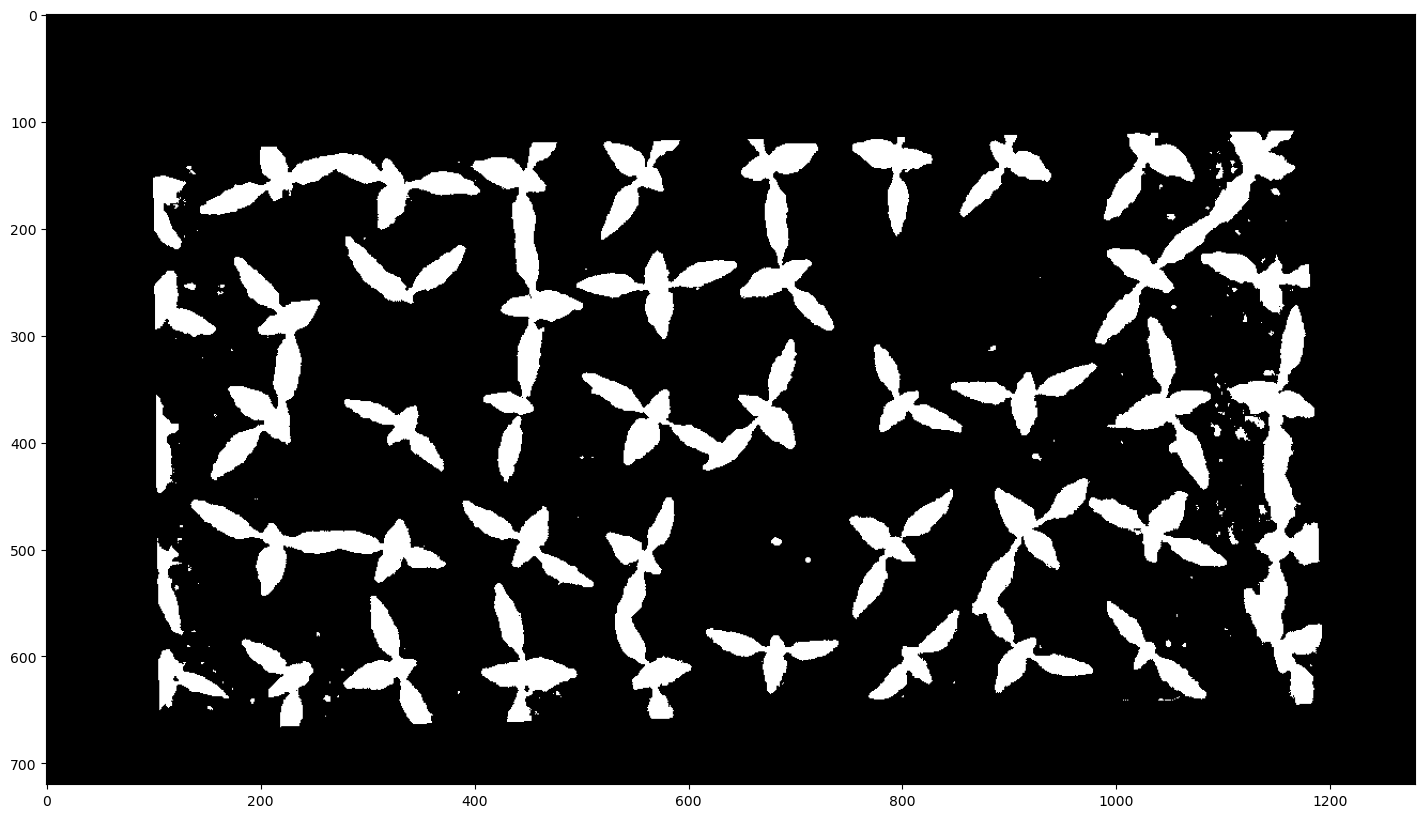

In [44]:
_, binary = cv.threshold(a_channel, 123, 255, cv.THRESH_BINARY_INV)
# ret, thresh = cv.threshold(a_channel, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
# print(ret)

plt.figure(figsize=(20, 10))
plt.imshow(binary, cmap='gray')
plt.show()


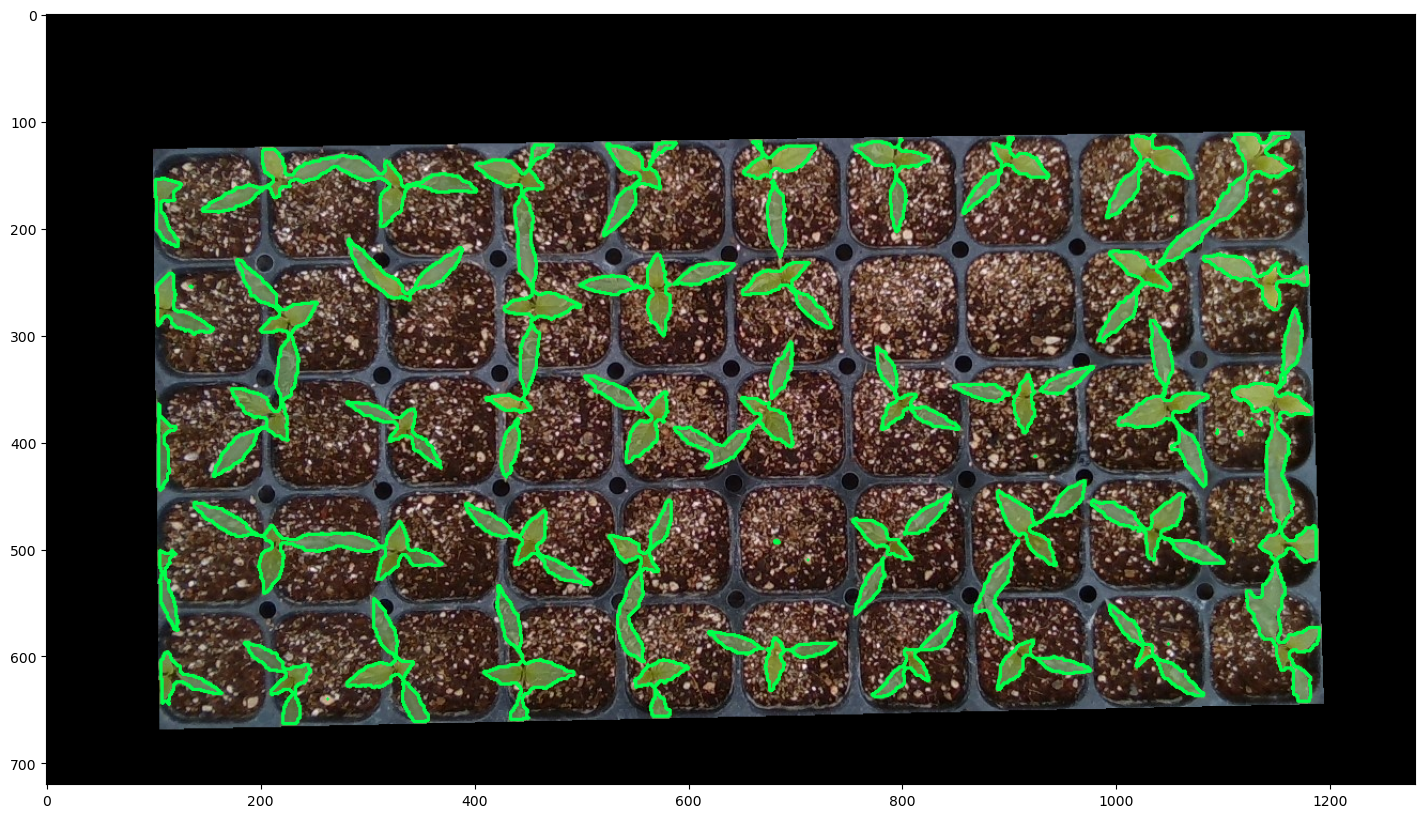

In [53]:
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img = cv.drawContours(black_cropped, contours, -1, (0,255,75), 2)

plt.figure(figsize=(20, 10))
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
for contour in contours:
    print(len(contour))

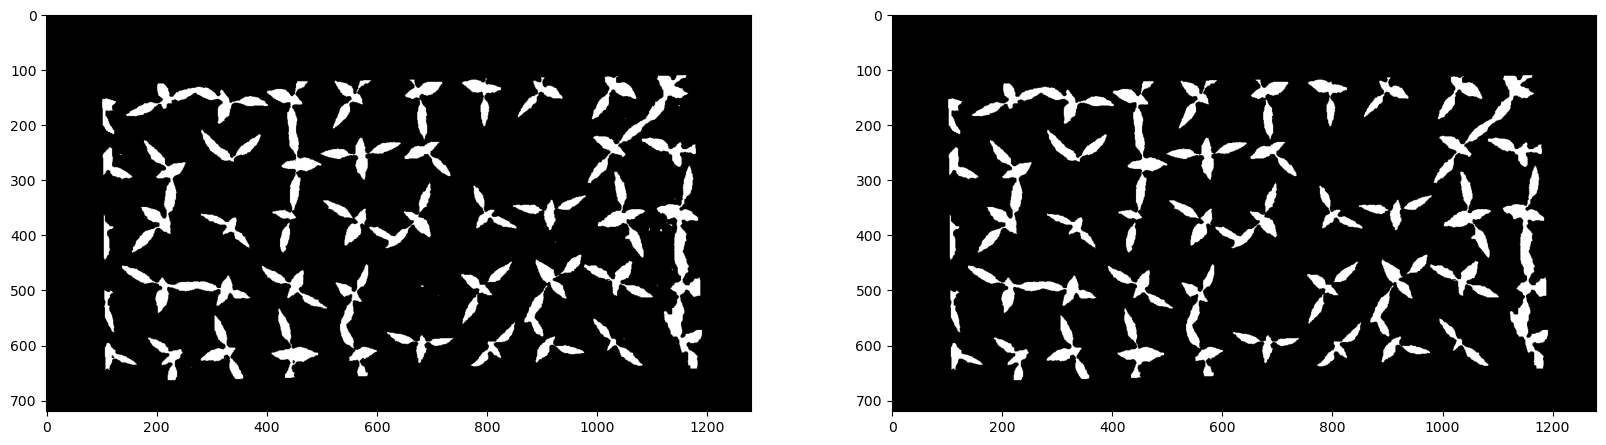

In [47]:
contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

small_noise = 150
big_noise = 1000

filter_small = [cnt for cnt in contours if cv.contourArea(cnt) > small_noise]
filter_big = [cnt for cnt in contours if cv.contourArea(cnt) < big_noise]

filtered_image = np.zeros_like(binary)
cv.drawContours(filtered_image, filter_small, -1, 255, thickness=cv.FILLED)

cv.imwrite('img/binary_sample.png', filtered_image)


plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1); plt.imshow(binary, cmap='gray')
plt.subplot(1, 2, 2); plt.imshow(filtered_image, cmap='gray')

plt.show()

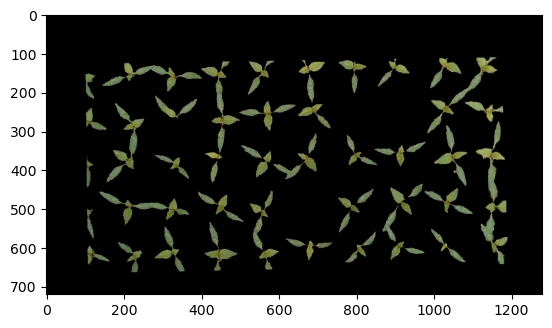

In [48]:
masked_image = cv.bitwise_and(image, image, mask=filtered_image)

plt.imshow(masked_image)
plt.show()

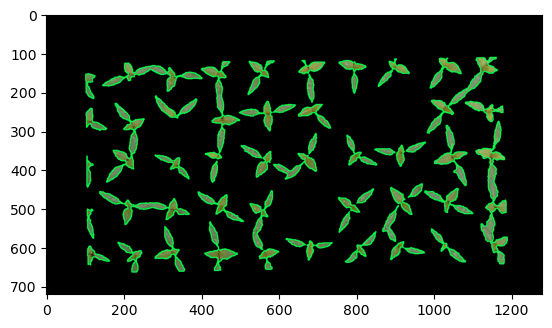

In [49]:
contours, hierarchy = cv.findContours(filtered_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img = cv.drawContours(masked_image, contours, -1, (0,255,75), 2)

plt.imshow(img)
plt.show()

TypeError: Image data of dtype object cannot be converted to float

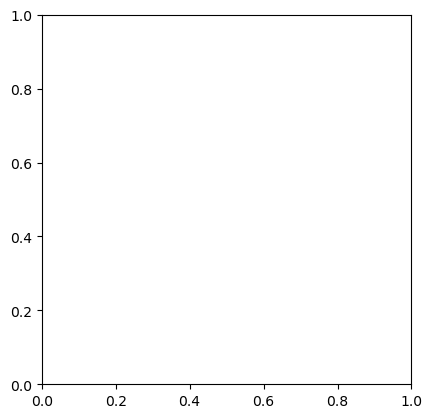

In [50]:
contours, _ = cv.findContours(filtered_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

leaf_contours = []
for contour in contours:
    area = cv.contourArea(contour)
    if area > 500:  # 필요한 면적 조건에 따라 필터링
        leaf_contours.append(contour)

# 객체 정렬 (예시: 면적 기준 정렬)
leaf_contours = sorted(leaf_contours, key=lambda c: cv.contourArea(c), reverse=True)


# 정렬된 객체 출력
for i, contour in enumerate(leaf_contours):
    # 객체에 대한 작업 수행 (예: 객체 주변에 사각형 그리기)
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv.putText(image, f"Leaf {i+1}", (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

plt.imshow(leaf_contours)